Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [115]:

import pandas as pd

df_fsq = pd.read_csv('df_fsq.csv')  
df_yelp = pd.read_csv('df_yelp.csv')       
df_bentonville = pd.read_csv('bentonville.csv') 
df_bentonville_pois = pd.read_csv('bentonville_pois.csv')
df_bentonville_yelp = pd.read_csv('bentonville_yelp.csv')



In [121]:
# joining the Foursquare data with the Bentonville data first on the station to get some additional information
# merging the Foursquare data with the Yelp data would not provide any insights so I merged one and then the other to see if anything came from that

df_merged4sq = pd.merge(df_fsq, df_bentonville, left_on="station", right_on=df_bentonville.index)

In [229]:
# checking the new dataframe
df_merged4sq
df_merged4sq.to_csv('df_merged4sq.csv', index=False)

In [122]:
df_mergedyelp = pd.merge(df_yelp, df_bentonville, left_on="station", right_on=df_bentonville.index)

In [230]:
df_mergedyelp
df_mergedyelp.to_csv('df_mergedyelp.csv', index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [236]:
from scipy.spatial import distance

# For each station, find the closest restaurant using the merged Foursquare dataframe


station_coords = df_bentonville[['latitude', 'longitude']].values
restaurant_coords_4sq = df_merged4sq[['geocodes.main.latitude', 'geocodes.main.longitude']].values
restaurant_names_4sq = df_merged4sq['name_x'].values

fsq_closest_restaurants = []

for i, (s_lat, s_lon) in enumerate(station_coords):
    dists = distance.cdist([[s_lat, s_lon]], restaurant_coords_4sq, metric='euclidean')[0]
    min_idx = dists.argmin()
    fsq_closest_restaurants.append({
        'station_name': df_bentonville.iloc[i]['name'],
        'station_latitude': s_lat,
        'station_longitude': s_lon,
        'restaurant_name': restaurant_names_4sq[min_idx],
        'restaurant_latitude': restaurant_coords_4sq[min_idx][0],
        'restaurant_longitude': restaurant_coords_4sq[min_idx][1],
        'distance': dists[min_idx]
    })


In [ ]:
# Create a DataFrame from the closest restaurants data
df_station_closest_restaurant = pd.DataFrame(fsq_closest_restaurants)
df_station_closest_restaurant

,station_name,station_latitude,station_longitude,restaurant_name,restaurant_latitude,restaurant_longitude,distance
0,Walmart International,36.36721,-94.21960,Panda Express,36.369602,-94.221306,0.002938
1,Walmart Supply Chain,36.37710,-94.22290,Logistics Cool Kids Table,36.377811,-94.223034,0.000724
2,Walmart Ol' Roy,36.36551,-94.18853,Big Rub BBQ,36.359588,-94.189344,0.005978
3,Walmart Welcome Center,36.36442,-94.19446,Char Broil,36.364742,-94.195790,0.001368
4,Walmart Training / Redbird Office Building,36.34648,-94.19562,Dance King Productions,36.348019,-94.197728,0.002610
5,Walmart Purpose,36.36433,-94.19119,Char Broil,36.364742,-94.195790,0.004618
6,Walton Family Whole Health and Fitness Center ...,36.36562,-94.19308,Char Broil,36.364742,-94.195790,0.002849
7,Walmart 8th & Plate,36.36276,-94.19128,Big Rub BBQ,36.359588,-94.189344,0.003716
8,Walmart J Street,36.34559,-94.20084,Club Infiniti,36.347790,-94.203965,0.003822
9,Walmart Global People Center,36.36455,-94.21428,Starbucks GPC HQ,36.364878,-94.214627,0.000477


In [205]:
from scipy.spatial import distance

# Find the closest station to each restaurant using the merged Foursquare dataframe


# Extract restaurant coordinates from df_merged4sq
restaurant_coords_4sq = df_merged4sq[['geocodes.main.latitude', 'geocodes.main.longitude']].values
station_coords_4sq = df_merged4sq[['latitude', 'longitude']].values
station_names_4sq = df_merged4sq['name_y'].values

fsq_closest_stations = []

for i, (r_lat, r_lon) in enumerate(restaurant_coords_4sq):
    # Compute distances to all stations
    dists = distance.cdist([[r_lat, r_lon]], station_coords_4sq, metric='euclidean')[0]
    min_idx = dists.argmin()
    fsq_closest_stations.append({
        'restaurant_name': df_merged4sq.iloc[i]['name_x'],
        'restaurant_address': df_merged4sq.iloc[i]['location.formatted_address'],
        'restaurant_latitude': r_lat,
        'restaurant_longitude': r_lon,
        'station_name': station_names_4sq[min_idx],
        'station_latitude': station_coords_4sq[min_idx][0],
        'station_longitude': station_coords_4sq[min_idx][1],
        'distance': dists[min_idx]
    })


In [ ]:
# Create a DataFrame from the closest stations data
df_fsq_closest_station = pd.DataFrame(fsq_closest_stations)
df_fsq_closest_station.head()


,restaurant_name,restaurant_address,restaurant_latitude,restaurant_longitude,station_name,station_latitude,station_longitude,distance
0,Chick-fil-A,"209 S Walton Blvd, Bentonville, AR 72712",36.370851,-94.220982,Walmart International,36.36721,-94.2196,0.003894
1,The Pedaler S Pub,"410 SW A St, Bentonville, AR 72712",36.367122,-94.210646,Walmart International,36.36721,-94.2196,0.008954
2,Crepes Paulette,"100 SW 8th St (SW A Street), Bentonville, AR 7...",36.364644,-94.209418,Walmart International,36.36721,-94.2196,0.010500
3,Wendy's,"814 S Walton Blvd, Bentonville, AR 72712",36.363141,-94.219442,Walmart International,36.36721,-94.2196,0.004072
4,Bike Rack Brewing Co.,"410 SW A St, Bentonville, AR 72712",36.367230,-94.210696,Walmart International,36.36721,-94.2196,0.008904


In [ ]:

df_fsq.to_csv('df_fsq_closest_station.csv', index=False)

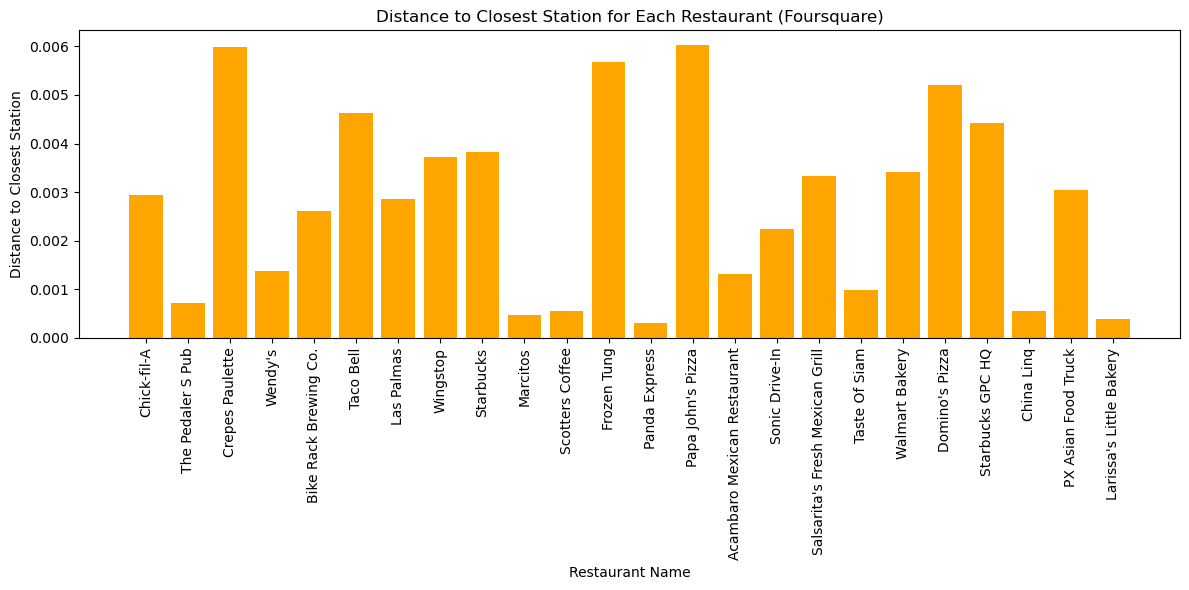

In [207]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df_fsq_closest_station['restaurant_name'][:24], min_distances, color='orange')
plt.xlabel('Restaurant Name')
plt.ylabel('Distance to Closest Station')
plt.title('Distance to Closest Station for Each Restaurant (Foursquare)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


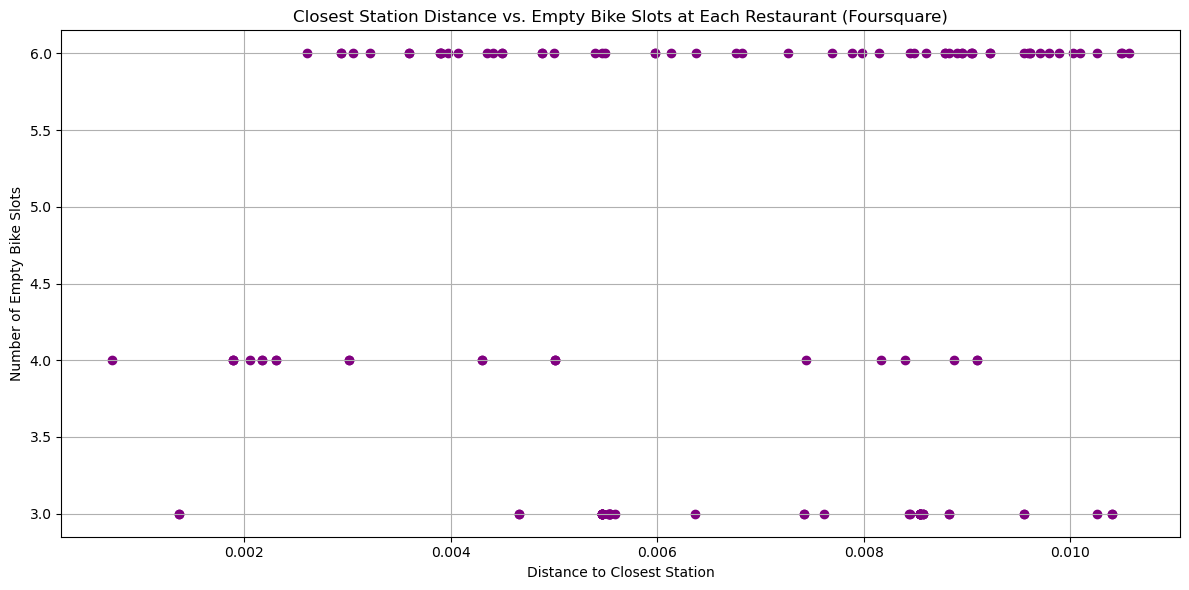

In [216]:
import matplotlib.pyplot as plt

# Plotting the distance to the closest station for each restaurant (Foursquare) against the number of empty bike slots at each station

plt.figure(figsize=(12, 6))
plt.scatter(df_fsq_closest_station['distance'], 
			df_bentonville.set_index('name').loc[df_fsq_closest_station['station_name'], 'empty_slots'], 
			color='purple')
plt.xlabel('Distance to Closest Station')
plt.ylabel('Number of Empty Bike Slots')
plt.title('Closest Station Distance vs. Empty Bike Slots at Each Restaurant (Foursquare)')
plt.grid(True)
plt.tight_layout()
plt.show()

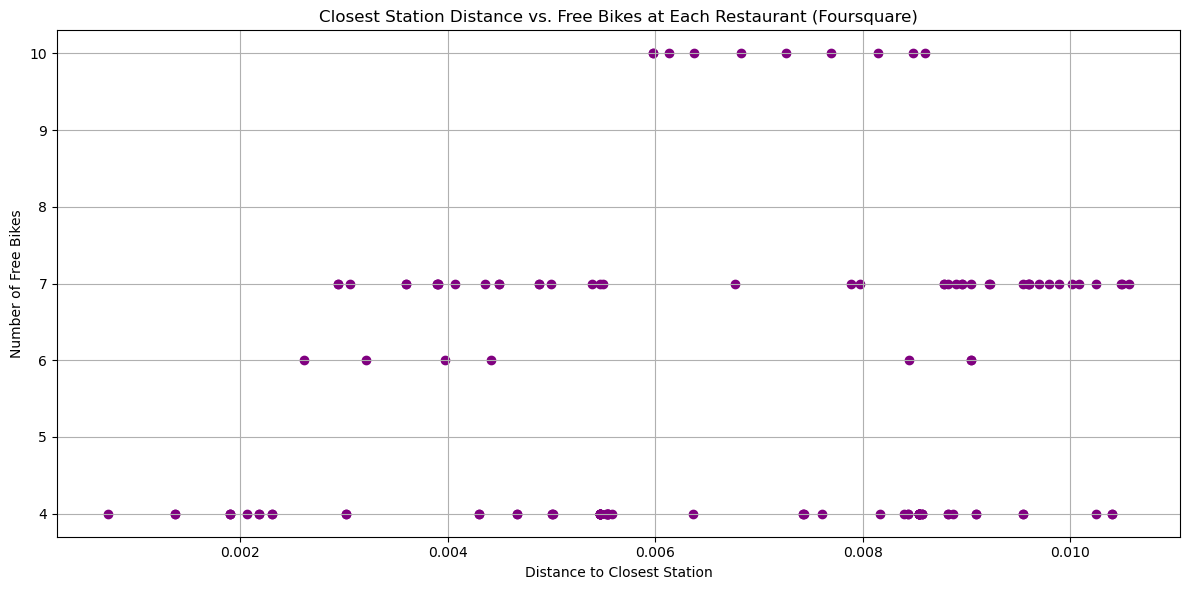

In [237]:

# Plotting the distance to the closest restaurant for each station against the number of free bikes at each station

plt.figure(figsize=(12, 6))
plt.scatter(df_fsq_closest_station['distance'], 
			df_bentonville.set_index('name').loc[df_fsq_closest_station['station_name'], 'free_bikes'], 
			color='purple')
plt.xlabel('Distance to Closest Station')
plt.ylabel('Number of Free Bikes')
plt.title('Closest Station Distance vs. Free Bikes at Each Restaurant (Foursquare)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Same thing for the Yelp data
df_mergedyelp = pd.merge(df_yelp, df_bentonville, left_on="station", right_on=df_bentonville.index)

In [227]:
df_mergedyelp 
df_mergedyelp.to_csv('df_mergedyelp.csv', index=False)

In [ ]:
from scipy.spatial import distance
# For each station, find the closest restaurant using the merged Yelp dataframe

restaurant_coords_yelp = df_mergedyelp[['coordinates.latitude', 'coordinates.longitude']].values
station_coords_yelp = df_bentonville[['latitude', 'longitude']].values
station_names_yelp = df_bentonville['name'].values

closest_stations = []

for i, (r_lat, r_lon) in enumerate(restaurant_coords_yelp):
    # Compute distances to all stations
    dists = distance.cdist([[r_lat, r_lon]], station_coords_yelp, metric='euclidean')[0]
    min_idx = dists.argmin()
    closest_stations.append({
        'restaurant_name': df_mergedyelp.iloc[i]['name_x'],
        'restaurant_address': df_mergedyelp.iloc[i]['location.address1'],
        'restaurant_latitude': r_lat,
        'restaurant_longitude': r_lon,
        'station_name': station_names_yelp[min_idx],
        'station_latitude': station_coords_yelp[min_idx][0],
        'station_longitude': station_coords_yelp[min_idx][1],
        'distance_km': dists[min_idx]
    })


In [232]:

df_yelp_closest_station = pd.DataFrame(closest_stations)
df_yelp_closest_station.head()

df_yelp_closest_station.to_csv('df_yelp_closest_station.csv', index=False)  

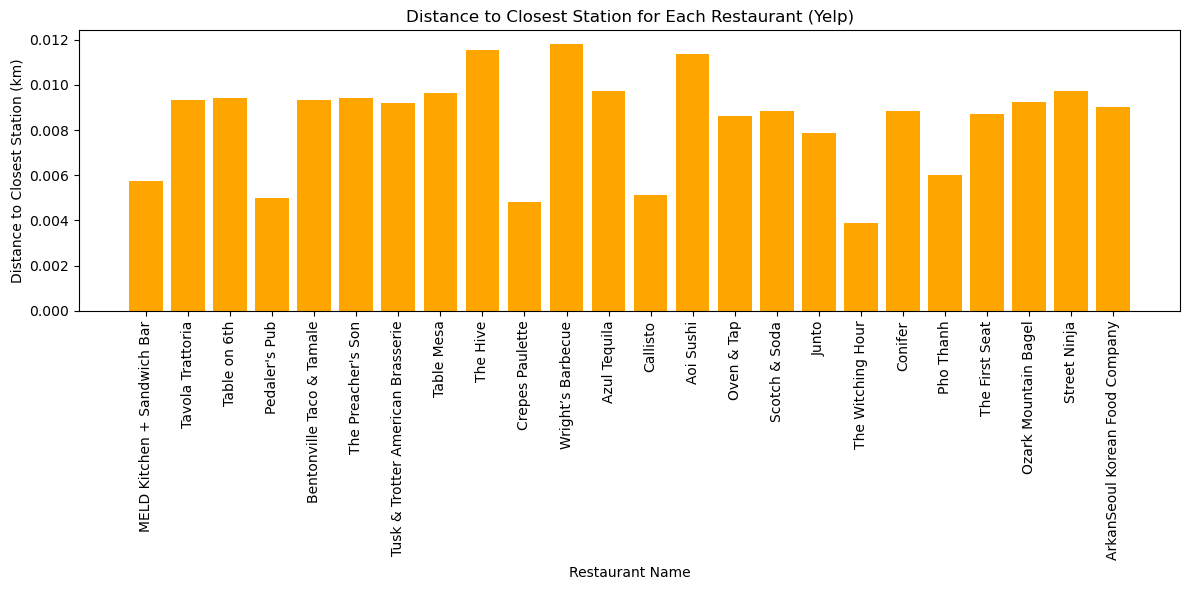

In [191]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df_yelp_closest_station['restaurant_name'][:24], df_yelp_closest_station['distance_km'][:24], color='orange')
plt.xlabel('Restaurant Name')
plt.ylabel('Distance to Closest Station (km)')
plt.title('Distance to Closest Station for Each Restaurant (Yelp)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

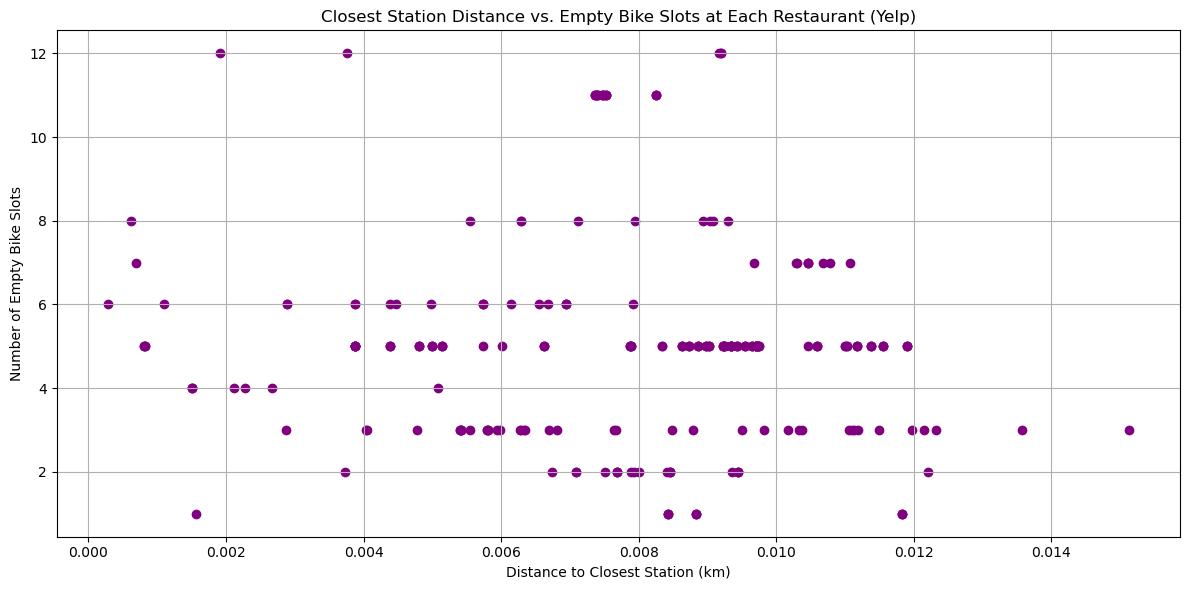

In [219]:
import matplotlib.pyplot as plt

# Plotting the distance to the closest restaurant against the number of empty bike slots at each station

plt.figure(figsize=(12, 6))
plt.scatter(df_yelp_closest_station['distance_km'], 
			df_bentonville.set_index('name').loc[df_yelp_closest_station['station_name'], 'empty_slots'], 
			color='purple')
plt.xlabel('Distance to Closest Station (km)')
plt.ylabel('Number of Empty Bike Slots')
plt.title('Closest Station Distance vs. Empty Bike Slots at Each Restaurant (Yelp)')
plt.grid(True)
plt.tight_layout()
plt.show()

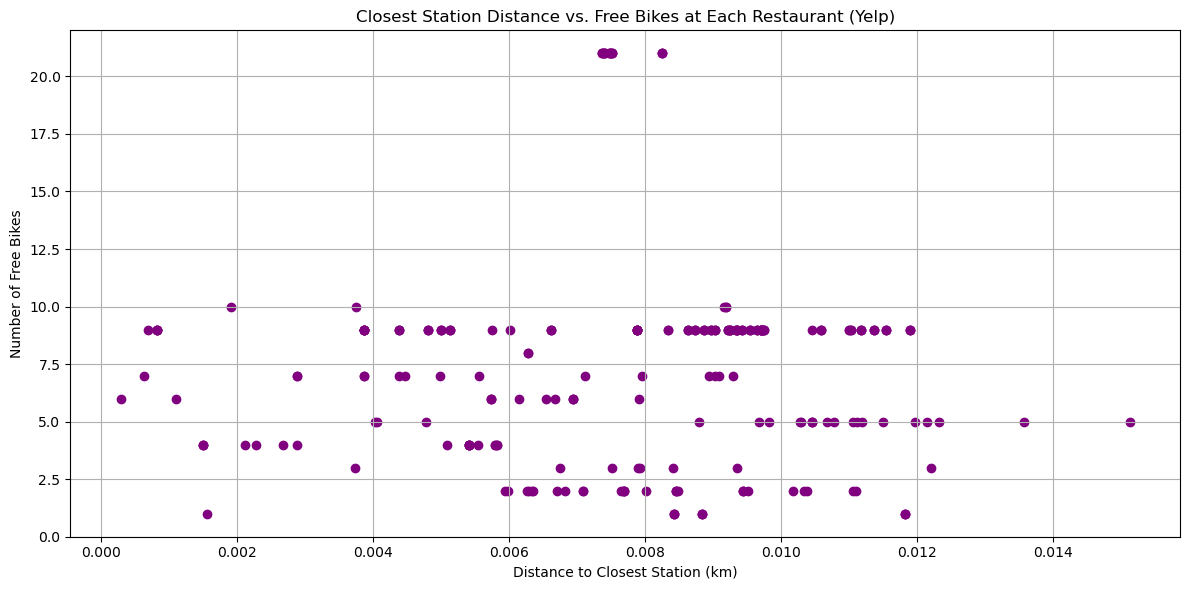

In [220]:
import matplotlib.pyplot as plt

# Plotting the distance to the closest restaurant against the number of empty bike slots at each station

plt.figure(figsize=(12, 6))
plt.scatter(df_yelp_closest_station['distance_km'], 
			df_bentonville.set_index('name').loc[df_yelp_closest_station['station_name'], 'free_bikes'], 
			color='purple')
plt.xlabel('Distance to Closest Station (km)')
plt.ylabel('Number of Free Bikes')
plt.title('Closest Station Distance vs. Free Bikes at Each Restaurant (Yelp)')
plt.grid(True)
plt.tight_layout()
plt.show()

Did not find much of a correlation (or any relationship at all) between the number of free bikes/empty slots at each station and the closest restaurant. It's hard to parse because, without much more data, it is impossible to know what those free bikes/empty slots mean. Are people biking to the restaurant? I guess we would need the GPS data from each bike and where the bike goes when it leave the station. Which bike station shows more activity at what time of the day? On what day of the week? My guess is that the bikes are used a lot more at the start of the work day and then at the end of the work day. 

The restaurants are different for each because of how Foursquare and Yelp classify restaurants. For example, Foursquare classifies a bakery as a restaurant while Yelp does not. 

The stations are all relatively close together so a lot of them point to the same restaurants. That could be explored a little more, but likely it's just because Bentonville is where the Walmart headquarters and it is  a huge site. [Here's the link](https://corporate.newhomeofficemap.walmart.com) if you're interested. 

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [222]:
from os import path
import sqlite3
from sqlite3 import Error

In [224]:
conn = sqlite3.connect('data/stats-model.db')
df_merged4sq.to_sql('merged4sq', conn, if_exists='replace', index=False)
df_mergedyelp.to_sql('mergedyelp', conn, if_exists='replace', index=False)

242

Look at the data before and after the join to validate your data.

In [226]:
df_from_db = pd.read_sql("SELECT * FROM fsq", conn)

print(df_from_db.head())

                     fsq_id  \
0  4bb0c114f964a520085a3ce3   
1  53cea5ae498e6131500c1fd9   
2  5862a1f1158b96178898ea98   
3  4b8dbf13f964a520bb0b33e3   
4  5441b307498e6bd51dec7685   

                                          categories  \
0  [{'id': 13055, 'name': 'Fried Chicken Joint', ...   
1  [{'id': 13003, 'name': 'Bar', 'short_name': 'B...   
2  [{'id': 13148, 'name': 'French Restaurant', 's...   
3  [{'id': 13031, 'name': 'Burger Joint', 'short_...   
4  [{'id': 13003, 'name': 'Bar', 'short_name': 'B...   

                                              chains   closed_bucket  \
0  [{'id': '16d16020-992b-0132-fd75-7a163eb2a6fc'...  VeryLikelyOpen   
1                                                 []          Unsure   
2                                                 []          Unsure   
3  [{'id': 'ab4ae740-d68a-012e-5619-003048cad9da'...  VeryLikelyOpen   
4                                                 []          Unsure   

   distance                                